# Machine Learning for Team TBD

Creating dataframe from csv

In [1]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
# Replace this with your actual dataset
df = pd.read_csv('./student_success_enhanced.csv')  # Adjust the filename

In [ ]:
# Display information about the dataset (columns, non-null values, data types)
print(df.shape)
print(df.info())

# Display the first few rows to understand the structure of the data
print(df.head())

# Optional: Check for missing values
print(df.isnull().sum())

(10000, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  10000 non-null  int64  
 1   GPA                         10000 non-null  float64
 2   SAT_Score                   10000 non-null  int64  
 3   ACT_Score                   10000 non-null  int64  
 4   Family_Size                 10000 non-null  int64  
 5   Income_Level                10000 non-null  object 
 6   Marital_Status              10000 non-null  object 
 7   Support_Center_Utilization  10000 non-null  float64
 8   Retention_Rate              10000 non-null  float64
 9   Graduation_Rate             10000 non-null  float64
 10  Life_Event                  3978 non-null   object 
 11  Institution_Type            10000 non-null  object 
 12  Graduation_Age              10000 non-null  float64
 13  Major               

In [ ]:
df.head()

,Student_ID,GPA,SAT_Score,ACT_Score,Family_Size,Income_Level,Marital_Status,Support_Center_Utilization,Retention_Rate,Graduation_Rate,...,Institution_Type,Graduation_Age,Major,Study_Hours_Per_Week,Student_Loan_Amount,Campus_Engagement,First_Gen_Student,Enrollment_Status,Distance_From_Home,Work_Hours_Per_Week
0,1,2.73,1174,26,1,High,Married,0.23,0.72,0.62,...,Private,22.3,STEM,13.3,30968.51,Low,False,Full-Time,42.0,16.9
1,2,2.61,1079,24,4,High,Married,0.15,0.68,0.63,...,Private,23.0,STEM,25.1,18679.95,Low,True,Full-Time,5.0,4.4
2,3,2.81,1197,26,4,Low,Married,0.47,0.61,0.58,...,Public,22.4,Education,15.1,39004.41,Low,False,Full-Time,62.9,9.5
3,4,3.35,1328,29,1,High,Divorced,0.00,0.90,0.90,...,Public,22.5,STEM,13.1,15563.23,Low,False,Full-Time,93.1,4.2
4,5,3.02,1064,23,1,Middle,Single,0.22,0.61,0.66,...,Public,22.9,Arts,21.8,6533.81,Low,False,Full-Time,63.1,15.5


# Preprocessing the data
We will do more with the pipeline, but this helps us to organize the dataset.

In [ ]:
# Dropping unnecessary columns
'''columns_to_drop = ['Student_ID', 'Family_Size', 'Student_Loan_Amount', 'Major',
                   'Graduation_Age', 'Graduation_Rate', 'Retention_Rate', 'Marital_Status']'''
columns_to_drop = ['Student_ID', 'Family_Size', 'Student_Loan_Amount', 'Major', 'Graduation_Age', 'Retention_Rate', 'Marital_Status']
df.drop(columns=columns_to_drop, inplace=True)

# Replacing missing values in the Life_Event column with 'None'
df['Life_Event'] = df['Life_Event'].fillna('None')
df.head(10)

,GPA,SAT_Score,ACT_Score,Income_Level,Support_Center_Utilization,Graduation_Rate,Life_Event,Institution_Type,Study_Hours_Per_Week,Campus_Engagement,First_Gen_Student,Enrollment_Status,Distance_From_Home,Work_Hours_Per_Week
0,2.73,1174,26,High,0.23,0.62,Family Issues,Private,13.3,Low,False,Full-Time,42.0,16.9
1,2.61,1079,24,High,0.15,0.63,None,Private,25.1,Low,True,Full-Time,5.0,4.4
2,2.81,1197,26,Low,0.47,0.58,None,Public,15.1,Low,False,Full-Time,62.9,9.5
3,3.35,1328,29,High,0.00,0.90,Health Issues,Public,13.1,Low,False,Full-Time,93.1,4.2
4,3.02,1064,23,Middle,0.22,0.66,None,Public,21.8,Low,False,Full-Time,63.1,15.5
5,2.43,1064,23,Middle,0.26,0.58,None,Private,13.0,Medium,False,Full-Time,64.8,14.7
6,3.64,1336,30,Low,0.28,0.65,Family Issues,Private,17.1,Low,False,Full-Time,65.2,8.7
7,2.80,1215,27,Low,0.36,0.84,Health Issues,Public,15.3,High,False,Full-Time,95.8,8.9
8,2.32,1029,23,Middle,0.56,0.56,None,Public,15.7,Low,False,Part-Time,65.8,8.3
9,3.20,1181,26,Middle,0.37,0.99,Family Issues,Public,3.1,Medium,False,Full-Time,90.8,14.4


In [ ]:
# Creating the 'success' column using GPA
'''
df['success'] = (df['GPA'] > 2.5)   # success = 1 if GPA > 2.5, else 0
df['success'] = df['success'].astype(int)  # Convert to 0/1
df['success'].value_counts()
'''

# Creating the 'success' column using Graduation_Rate
df['Success'] = (df['Graduation_Rate'] >= 0.5)   # success = 1 if Graduation_Rate > 0.5, else 0
df['Success'] = df['Graduation_Rate'].astype(int)  # Convert to 0/1
df['Success'].value_counts()

,count
Success,
0,9771
1,229


# Creating a pipeline
This will streamline preprocessing

In [ ]:
# Define features and target
X = df.drop(columns=['success'])  # Replace 'target' with your actual target column name
y = df['success']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Identify numeric and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

# Preprocessing for numeric and categorical features
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine preprocessors in a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Define a pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Set up the parameter grid for hyperparameter tuning
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2]
}

# Grid search for hyperparameter tuning
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the model
y_pred = best_model.predict(X_test)
print("Best Parameters:", grid_search.best_params_)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.5s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.5s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.5s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.5s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.5s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.9s
[CV] END classifier__max_depth=None, 

Display a Confusion Matrix

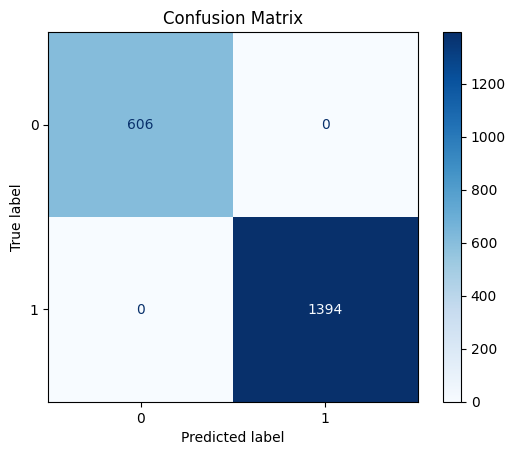

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap=plt.cm.Blues)

# Show the plot
plt.title("Confusion Matrix")
plt.show()

# Using K-Means Clustering
We will do this to categorize/cluster similar points. We do this because there is not currently a target variable in our dataset.

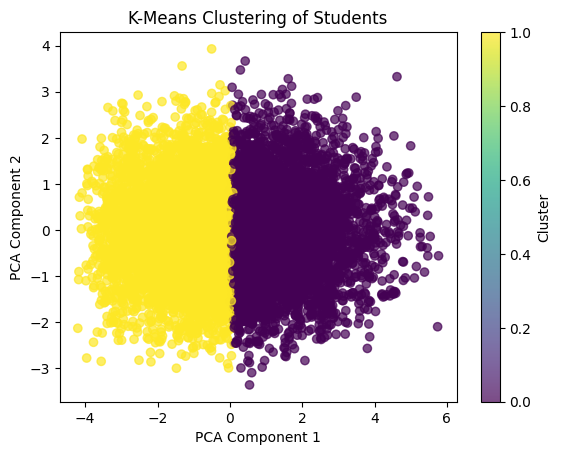

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load your dataset
df = pd.read_csv('./student_success_enhanced.csv')  # Replace with your dataset

# Select relevant features for clustering
features = ['GPA', 'SAT_Score', 'ACT_Score', 'Income_Level', 'Support_Center_Utilization', 'Life_Event', 'Institution_Type',
            'Study_Hours_Per_Week', 'Campus_Engagement', 'First_Gen_Student', 'Enrollment_Status', 'Distance_From_Home', 'Work_Hours_Per_Week']  # Update with actual feature names
X = df[features]

# Preprocess data
# Identify numeric and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

# Preprocessing for numeric and categorical features
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine preprocessors in a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Define a pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(n_clusters=2, random_state=42))
])

# Fit the pipeline
pipeline.fit(X)

# Add the cluster labels to the original dataframe
df['cluster'] = pipeline['kmeans'].labels_

# Optional: Reduce dimensionality for easier clustering visualization
X_transformed = pipeline['preprocessor'].transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_transformed)

# Visualize the clusters
import matplotlib.pyplot as plt

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'], cmap='viridis', alpha=0.7)
plt.title('K-Means Clustering of Students')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()
